# Georgia ESOL in Public Schools - EDA

In [1]:
# import our favorite libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time

## I. Scrape the data from the Georgia DOE

In [2]:
def file_reader(url):
    if url[-4:] == 'xlsx':
        return pd.read_excel(url)
    else:
        return pd.read_csv(url)

In [3]:
# set aside the customized urls for the CSV files that we're looking to read in to pandas DFs
data_urls = ['https://gosa.georgia.gov/sites/gosa.georgia.gov/files/related_files/site_page/Enrollment_by_Subgroups_Programs_2012.xlsx',
            'https://gosa.georgia.gov/sites/gosa.georgia.gov/files/related_files/site_page/Enrollment_by_Subgroups_Programs_2013.csv',
            'https://gosa.georgia.gov/sites/gosa.georgia.gov/files/related_files/site_page/Enrollment_by_Subgroups_Programs_2014_Jan_15th_2015.csv',
            'https://gosa.georgia.gov/sites/gosa.georgia.gov/files/related_files/site_page/Enrollment_by_Subgroups_Programs_2015_DEC_1st_2016.csv',
            'https://gosa.georgia.gov/sites/gosa.georgia.gov/files/related_files/site_page/Enrollment_by_Subgroups_Programs_2016_DEC_1st_2016.csv',
            'https://gosa.georgia.gov/sites/gosa.georgia.gov/files/related_files/site_page/Enrollment_by_Subgroups_Programs_2017_DEC_1st_2017.csv',
            'https://download.gosa.ga.gov/2018/Enrollment_by_Subgroups_Programs_2018_DEC_10th_2018.csv'
             ]

In [4]:
# scrape the CSVs into pandas DFs, one year per
start = time.time()
dfs = list(map(file_reader, data_urls))
stop = time.time()
print('Data retrieved in', round(stop-start, 2), 'seconds')

Data retrieved in 7.04 seconds


In [5]:
# we see that the most recent DF has two extra columns at the end, which we'll remove for now to allow for concatenation
# these features are % male and % female, which aren't relevant for us here
for df in dfs:
    print(len(df.columns))
    
dfs[-1].drop(list(dfs[-1].columns[-2:]), axis=1, inplace=True)

35
35
35
35
35
35
37


In [6]:
# concatenate all years' data into one master dataframe
esl_df = pd.concat(dfs, axis=0)

In [7]:
# sneak-peek of our DF
esl_df.head(15)

DETAIL_LVL_DESC INSTN_NUMBER SCHOOL_DSTRCT_CD LONG_SCHOOL_YEAR  \
0           School         0103              601          2011-12   
1           School         0109              601          2011-12   
2           School         0177              601          2011-12   
3           School         0195              601          2011-12   
4           School         0277              601          2011-12   
5           School         1050              601          2011-12   
6           School         5050              601          2011-12   
7         District          ALL              601          2011-12   
8           School         0103              602          2011-12   
9           School         0111              602          2011-12   
10          School         0187              602          2011-12   
11          School         0190              602          2011-12   
12        District          ALL              602          2011-12   
13          School         0102              603          2011-12   
14          School         0202              603          2011-12   

                           INSTN_NAME SCHOOL_DSTRCT_NM  \
0          Appling County High School   Appling County   
1         Baxley Wilderness Institute   Appling County   
2    Appling County Elementary School   Appling County   
3        Appling County Middle School   Appling County   
4       Appling County Primary School   Appling County   
5          Altamaha Elementary School   Appling County   
6   Fourth District Elementary School   Appling County   
7                   All Column Values   Appling County   
8         Atkinson County High School  Atkinson County   
9       Atkinson County Middle School  Atkinson County   
10     Willacoochee Elementary School  Atkinson County   
11          Pearson Elementary School  Atkinson County   
12                  All Column Values  Atkinson County   
13        Bacon County Primary School     Bacon County   
14         Bacon County Middle School     Bacon County   

                           GRADES_SERVED_DESC  ENROLL_PERCENT_ASIAN  \
0                                 09,10,11,12                   1.0   
1                                 07,08,09,10                   0.0   
2                                    03,04,05                   1.0   
3                                    06,07,08                   1.0   
4                                 PK,KK,01,02                   1.0   
5                        PK,KK,01,02,03,04,05                   0.0   
6                        PK,KK,01,02,03,04,05                   0.0   
7   PK,KK,01,02,03,04,05,06,07,08,09,10,11,12                   1.0   
8                                 09,10,11,12                   0.0   
9                                    06,07,08                   0.0   
10                       PK,KK,01,02,03,04,05                   0.0   
11                       PK,KK,01,02,03,04,05                   0.0   
12  PK,KK,01,02,03,04,05,06,07,08,09,10,11,12                   0.0   
13                                PK,KK,01,02                   1.0   
14                                   06,07,08                   0.0   

    ENROLL_PERCENT_NATIVE  ENROLL_PERCENT_BLACK  ...  ENROLL_COUNT_ESOL  \
0                     0.0                  22.0  ...                8.0   
1                     0.0                  64.0  ...                0.0   
2                     0.0                  31.0  ...                9.0   
3                     0.0                  21.0  ...               15.0   
4                     0.0                  28.0  ...               82.0   
5                     0.0                   3.0  ...                9.0   
6                     0.0                  12.0  ...                6.0   
7                     0.0                  22.0  ...              129.0   
8                     0.0                  18.0  ...               10.0   
9                     0.0                  20.0  ...               11.0   
10     

### Inital thoughts
The structure of the data is fairly simple. For each year from 2011-2018, each public school in Georgia has a row that contains ~30 data points regarding its demographic makeup. The only features we care about for this analysis are those relating to ESOL students. We will clean up our data a bit and then venture into EDA.

## II. Clean up and Check out the Data

In [8]:
# drop pre-aggregated columns
esl_df = esl_df.loc[esl_df.DETAIL_LVL_DESC.str.lower() != 'district']

In [9]:
# map columns to all lowercase
esl_df.columns = map(str.lower, esl_df.columns)

In [10]:
esl_df.describe()

enroll_percent_asian  enroll_percent_native  enroll_percent_black  \
count          15913.000000           15913.000000          15913.000000   
mean               2.869352               0.102620             39.519827   
std                5.804786               0.344224             30.875535   
min                0.000000               0.000000              0.000000   
25%                0.000000               0.000000             13.000000   
50%                1.000000               0.000000             32.000000   
75%                3.000000               0.000000             64.000000   
max               71.000000              12.000000            100.000000   

       enroll_percent_hispanic  enroll_percent_multiracial  \
count             15913.000000                15913.000000   
mean                 12.573996                    3.247659   
std                  14.821417                    1.991355   
min                   0.000000                    0.000000   
25%                   4.000000                    2.000000   
50%                   8.000000                    3.000000   
75%                  15.000000                    4.000000   
max                  98.000000                   20.000000   

       enroll_percent_white  enroll_percent_migrant  enroll_percent_ed  \
count           15913.00000            15917.000000       15906.000000   
mean               41.52366                0.280769          65.990695   
std                29.38793                1.181299          26.916958   
min                 0.00000                0.000000           0.000000   
25%                11.00000                0.000000          47.000000   
50%                44.00000                0.000000          69.000000   
75%                67.00000                0.000000          90.000000   
max                99.00000               24.000000         100.000000   

       enroll_percent_swd  enroll_percent_lep  ...  enroll_count_esol  \
count        15911.000000        15917.000000  ...       15907.000000   
mean            11.715794            7.550983  ...          76.149997   
std              7.329275           12.309330  ...        1827.502704   
min              0.000000            0.000000  ...           0.000000   
25%              8.800000            1.000000  ...           1.000000   
50%             11.000000            3.000000  ...          11.000000   
75%             13.400000            8.000000  ...          38.000000   
max            100.000000          100.000000  ...      102993.000000   

       enroll_pct_esol  enroll_count_special_ed_pk  enroll_pct_special_ed_pk  \
count     15907.000000                15911.000000              15911.000000   
mean          5.123870                    8.677456                 15.799491   
std           9.541068                  208.135653                 31.775093   
min           0.000000                    0.000000                  0.000000   
25%           0.200000                    0.000000                  0.000000   
50%           1.600000                    0.000000                  0.000000   
75%           5.400000                    6.000000                 12.800000   
max         100.000000                10731.000000                759.400000   

       enroll_count_vocation_9_12  enroll_pct_vocation_9_12  \
count                 3371.000000               3371.000000   
mean                  1142.911896                 53.912133   
std                  12524.965551                 23.400025   
min                      0.000000                  0.000000   
25%                    231.000000                 40.950000   
50%                    564.000000                 58.900000   
75%                    859.000000                 70.450000   
max                 292654.000000                100.000000   

       enroll_count_alt_programs  enroll_pct_alt_programs  \
count               15907.000000             15907.000000   
mean                   28.3

### Playing with a new tool
I want to try out the pandas_profiling library for auto-EDA. I saw a [medium post](https://towardsdatascience.com/a-better-eda-with-pandas-profiling-e842a00e1136) that used it and I want to see if it can be of any help here. It renders a pretty HTML file in-line for EDA, which I have uploaded to this repo rather than displaying in-line here.

In [11]:
import pandas_profiling
profile = esl_df.profile_report(title='GA ESL Data Profile')
profile.to_file('data_profile.html')
profile

Examining our key feature, `enroll_pct_esol`, it seems that 22.7% of the schools are missing values and the mean pct of ESOL enrollment is around 5%. The median is 1.6% with IQR 5.2%. A histogram might be helpful here in visualizing our data.

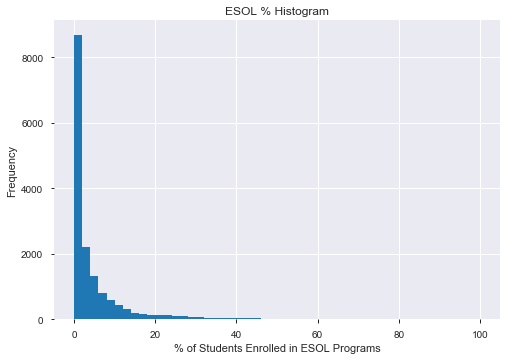

In [12]:
plt.hist(esl_df['enroll_pct_esol'], bins=50)
plt.xlabel('% of Students Enrolled in ESOL Programs')
plt.ylabel('Frequency')
plt.title('ESOL % Histogram')
plt.show()

It seems that the vast majority of the values for `enroll_pct_esol` are in the 0%-2% range, which is to be expected. Gerrymandering of school districts is a real thing, and the reality is that many students with non-English first languages are more likely to live in commutities with other students of similar cultural backgrounds.

In [13]:
esl_df = esl_df[['instn_number',
                 'school_dstrct_cd',
                 'long_school_year',
                 'instn_name',
                 'school_dstrct_nm',
                 'grades_served_desc',
                 'enroll_count_esol',
                 'enroll_pct_esol']]

In [14]:
esl_df.head()

instn_number school_dstrct_cd long_school_year  \
0         0103              601          2011-12   
1         0109              601          2011-12   
2         0177              601          2011-12   
3         0195              601          2011-12   
4         0277              601          2011-12   

                         instn_name school_dstrct_nm grades_served_desc  \
0        Appling County High School   Appling County        09,10,11,12   
1       Baxley Wilderness Institute   Appling County        07,08,09,10   
2  Appling County Elementary School   Appling County           03,04,05   
3      Appling County Middle School   Appling County           06,07,08   
4     Appling County Primary School   Appling County        PK,KK,01,02   

   enroll_count_esol  enroll_pct_esol  
0                8.0              0.8  
1                0.0              0.0  
2                9.0              1.7  
3               15.0              2.0  
4               82.0             13.6

# Visualizing ESOL student enrollment on a map of Georgia

We start off by using `geopy`'s `Nomatim` geocoder to map each school name to its coordinates. We have to apply a delay between each call to the Nomatim API so as to not timeout. This takes a while, but it's great that we're able grab latitude and longitude with a simple API call.

In [15]:
from geopy import geocoders
from geopy.extra.rate_limiter import RateLimiter

In [24]:
geolocator = geocoders.Nominatim(user_agent='my-application', timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [17]:
esl_df['location_name'] = esl_df['instn_name']+ ', Georgia, USA'

In [18]:
loc_names = pd.DataFrame(pd.unique(esl_df['location_name']))
loc_names.rename({0:'location_name'}, axis=1, inplace=True)

In [25]:
loc_names['location'] = loc_names['location_name'].apply(geocode)

In [32]:
loc_names['latitude'] = loc_names['location'].apply(lambda x: (x.latitude if x else None))
loc_names['longitude'] = loc_names['location'].apply(lambda x: (x.longitude if x else None))

In [34]:
loc_names.head()

location_name  \
0        Appling County High School, Georgia, USA   
1       Baxley Wilderness Institute, Georgia, USA   
2  Appling County Elementary School, Georgia, USA   
3      Appling County Middle School, Georgia, USA   
4     Appling County Primary School, Georgia, USA   

                                            location   latitude  longitude  
0  (Appling County High School, Blackshear Highwa...  31.757633 -82.354753  
1                                               None        NaN        NaN  
2  (Appling County Elementary School, Auburn Stre...  31.754362 -82.354296  
3                                               None        NaN        NaN  
4  (Appling County Primary School, Auburn Street,...  31.754362 -82.354851

In [35]:
loc_names.to_csv('geocoded_data.csv')